In [1]:
import numpy as np
from bezierv.classes.distfit import DistFit
from bezierv.algorithms.proj_grad import ProjGrad
from bezierv.classes.bezierv import Bezierv

In [2]:
data = np.random.normal(loc=1, scale=1, size=500)
distfit = DistFit(data=data)
bezierv = distfit.fit(method='projgrad', threshold_PG=1e-3)

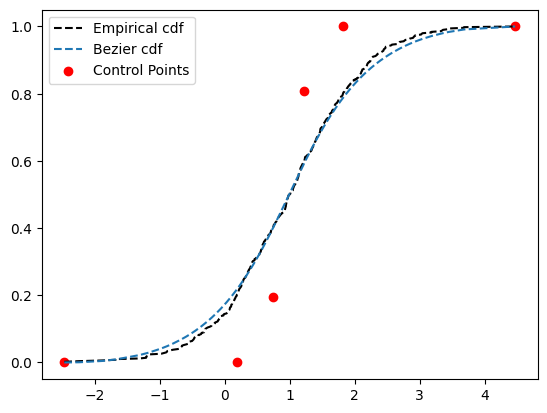

In [3]:
bezierv.plot_cdf(np.sort(data))

In [4]:
bezierv = Bezierv(5)
projgrad = ProjGrad(bezierv, np.sort(data))
z = np.linspace(0, 1, 6)
fit = projgrad.fit(z)

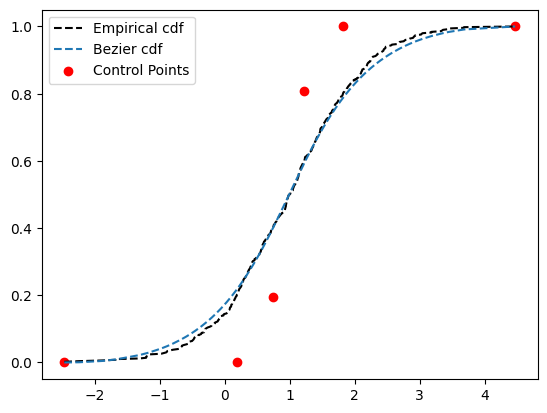

In [5]:
fit.plot_cdf(np.sort(data))